In [2]:
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import gamma

df = pd.read_csv("数据源/order_train1.csv", encoding="gbk")
df["order_date"]=df["order_date"].apply(pd.to_datetime,format='%Y-%m-%d')
# data.drop('order_date', axis=1, inplace=True)

df = df.set_index('order_date')
df_train = df[['sales_region_code', 'first_cate_code','second_cate_code','item_code','ord_qty']]
df_train

,sales_region_code,first_cate_code,second_cate_code,item_code,ord_qty
order_date,,,,,
2015-09-01,104,307,403,22069,19
2015-09-01,104,301,405,20028,12
2015-09-02,104,307,403,21183,109
2015-09-02,104,308,404,20448,3
2015-09-02,104,307,403,21565,3
...,...,...,...,...,...
2018-12-20,102,302,408,20994,59
2018-12-20,102,302,408,21875,502
2018-12-20,102,302,408,20215,106


In [3]:
pre = pd.read_csv("数据源/predict_sku1.csv", encoding="gbk")
## 查看预测数据
data_pre = pd.DataFrame(pre,columns=['sales_region_code', 'first_cate_code', 'second_cate_code','item_code'])
data_pre
# groupby(['sales_region_code'])['ord_qty'].sum().sort_values()

,sales_region_code,first_cate_code,second_cate_code,item_code
0,101,303,406,20002
1,101,301,405,20003
2,101,307,403,20006
3,101,303,401,20011
4,101,307,403,20014
...,...,...,...,...
2614,105,307,403,22066
2615,105,305,412,22072
2616,105,307,403,22075
2617,105,303,401,22083


In [3]:
data_pre.groupby(['item_code'])['sales_region_code'].count()

item_code
20002    4
20003    4
20004    1
20006    4
20008    1
        ..
22075    4
22081    3
22082    1
22083    2
22084    4
Name: sales_region_code, Length: 987, dtype: int64

In [4]:
df_train_a = df[['sales_region_code', 'first_cate_code','second_cate_code','item_code']]
df_train_a.value_counts()

sales_region_code  first_cate_code  second_cate_code  item_code
102                306              407               20973        3241
103                306              407               20973        3079
102                306              407               21271        2845
101                306              407               21271        2649
103                306              407               21271        2601
                                                                   ... 
104                307              403               21633           1
                                                      21603           1
102                306              407               20451           1
104                307              403               20936           1
103                306              407               20883           1
Length: 5366, dtype: int64

In [5]:
df_train.groupby(['item_code', 'sales_region_code', 'first_cate_code', 'second_cate_code'])
df_train.value_counts()

sales_region_code  first_cate_code  second_cate_code  item_code  ord_qty
101                306              407               20501      9          93
102                306              407               20501      7          93
                                                                 6          92
                                                                 9          91
101                306              407               20501      10         86
                                                                            ..
102                306              407               21956      72          1
                                                                 102         1
                                                                 109         1
                                                                 205         1
105                308              404               22050      308         1
Length: 225862, dtype: int64

In [6]:
data_pre

,sales_region_code,first_cate_code,second_cate_code,item_code
0,101,303,406,20002
1,101,301,405,20003
2,101,307,403,20006
3,101,307,403,20014
4,101,303,401,20016
...,...,...,...,...
2613,105,307,403,22066
2614,105,305,412,22072
2615,105,307,403,22075
2616,105,303,401,22083


In [3]:
data_pre[(data_pre['item_code'] == 20160) & (data_pre['sales_region_code'] == 101) & (data_pre['first_cate_code'] == 303) & (data_pre['second_cate_code'] ==410)]

,sales_region_code,first_cate_code,second_cate_code,item_code
44,101,303,410,20160


In [1]:
df_train[(df_train['item_code'] == 21320) & (df_train['sales_region_code'] == 101) & (df_train['first_cate_code'] == 306) & (df_train['second_cate_code'] ==407)]

NameError: name 'df_train' is not defined

In [44]:
check33 = df[(df['item_code'] == 20039) & (df['sales_region_code'] == 101) & (df['first_cate_code'] == 305) & (df['second_cate_code'] ==412)]
check33

,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
order_date,,,,,,,
2018-12-11,101,20039,305,412,online,513.0,404
2018-12-13,101,20039,305,412,online,508.0,109
2018-12-17,101,20039,305,412,online,501.0,10


In [10]:
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

filtered_df = df[(df['item_code'] == 21361) & (df['sales_region_code'] == 102) & (df['first_cate_code'] == 303) & (df['second_cate_code'] ==401)]
# print(filtered_df)
filtered_df_byday = filtered_df.groupby([pd.Grouper(freq='D')])['ord_qty'].mean().reset_index()
# print(filtered_df_byday)
filtered_df_byday.set_index('order_date',inplace = True)
# print(filtered_df_byday)
filtered_df_byday = filtered_df_byday.fillna(method='ffill')

values = filtered_df_byday['ord_qty'].values.reshape(-1,1)
# print(values.shape)
# print(values.shape[0])
# print(values.shape[1])
# print(filtered_df_byday)
# print(values)
# values.to_numpy(values)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# 指定 EarlyStopping 回调函数
early_stop = EarlyStopping(monitor='val_loss', patience=20)

model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.LSTM(32),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(1)
                ])
 # Compile the model
model.compile(optimizer=Adam(0.0009), loss='mse')
 # Train the model
history = model.fit(
    X_train, y_train,
    epochs=850,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stop]  # 添加 EarlyStopping 回调函数
)
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# 计算均方误差、平均绝对误差、R2分数
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mape = np.mean(np.abs((y_test - y_pred) / y_test))

print('均方误差: %.3f' % mse)
print('平均绝对误差: %.3f' % mae)
print('均方根误差: %.3f' % rmse)
print('平均绝对百分比误差:', mape)
print('R2分数: %.3f' % r2)

Epoch 1/850
13/13 [==============================] - 6s 69ms/step - loss: 0.0300 - val_loss: 0.0334
Epoch 2/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0215 - val_loss: 0.0244
Epoch 3/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.0181
Epoch 4/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0122 - val_loss: 0.0150
Epoch 5/850
13/13 [==============================] - 0s 7ms/step - loss: 0.0111 - val_loss: 0.0137
Epoch 6/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0130
Epoch 7/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.0124
Epoch 8/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.0118
Epoch 9/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0110
Epoch 10/850
13/13 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0100
Epoch 11

In [54]:
check33.to_csv('check2.csv')

In [86]:
a = data_pre[(data_pre['sales_region_code'] == 101) & (data_pre['first_cate_code'] == 305) & (data_pre['second_cate_code'] == 412)]
predictions_df = []
# a
item_code = a.iloc[0,3]
item_code
# print(item_code)
    # # 将销售区域代码、物品代码、一级类别代码、二级类别代码以及未来30天的预测值总和追加到predictions_df
    # predictions_df = predictions_df.append({
    #     'sales_region_code': region_code,
    #     'item_code':item_code,
    #     'first_cate_code': first_cate_code,
    #     'second_cate_code': second_cate_code,
    #     'mse': avg_mse,
    #     'prediction_1_month': future_sum_1_month,
    #     'prediction_2_month': future_sum_2_month,
    #     'prediction_3_month': future_sum_3_month
    # }, ignore_index=True)


20020

In [ ]:
type(data_pre)

In [11]:

# df_train_20006 = df_train.loc[(df_train['item_code'] == 20002) & (df_train['sales_region_code'] == 101) & (df_train['first_cate_code'] == 303) & (df_train['second_cate_code'] ==406)]

In [3]:
df_train_20006 = df_train.loc[(df_train['item_code'] == 20006)]

周粒度

In [4]:
df_train_20006_byweek = df_train_20006.groupby(pd.Grouper(freq='W'))['ord_qty'].mean().reset_index()
df_train_20006_byweek.set_index('order_date',inplace = True)

df_train_20006_byweek=df_train_20006_byweek.fillna(method='ffill')

df_train_20006_byweek

,ord_qty
order_date,
2015-09-13,15.000000
2015-09-20,15.500000
2015-09-27,23.000000
2015-10-04,14.000000
2015-10-11,18.000000
...,...
2018-11-18,26.714286
2018-11-25,168.000000
2018-12-02,168.000000


In [5]:
df_train_20006_byday = df_train_20006.groupby([pd.Grouper(freq='D')])['ord_qty'].mean().reset_index()
df_train_20006_byday.set_index('order_date',inplace = True)

df_train_20006_byday=df_train_20006_byday.fillna(method='ffill')

df_train_20006_byday

,ord_qty
order_date,
2015-09-13,15.0
2015-09-14,15.0
2015-09-15,15.0
2015-09-16,15.0
2015-09-17,17.0
...,...
2018-12-12,7.0
2018-12-13,7.0
2018-12-14,7.0


In [6]:
df_train_20006_bymonth = df_train_20006.groupby([pd.Grouper(freq='M')])['ord_qty'].mean().reset_index()
df_train_20006_bymonth.set_index('order_date',inplace = True)

df_train_20006_bymonth=df_train_20006_bymonth.fillna(method='ffill')

df_train_20006_bymonth

,ord_qty
order_date,
2015-09-30,17.666667
2015-10-31,116.866667
2015-11-30,156.833333
2015-12-31,31.461538
2016-01-31,56.060606
2016-02-29,25.500000
2016-03-31,76.351351
2016-04-30,27.040000
2016-05-31,64.830189


<AxesSubplot: title={'center': '月粒度'}, xlabel='order_date', ylabel='ord_qty'>

D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31890 (\N{CJK UNIFIED IDEOGRAPH-7C92}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31890 (\N{CJK UNIFIED IDEOGRAPH-

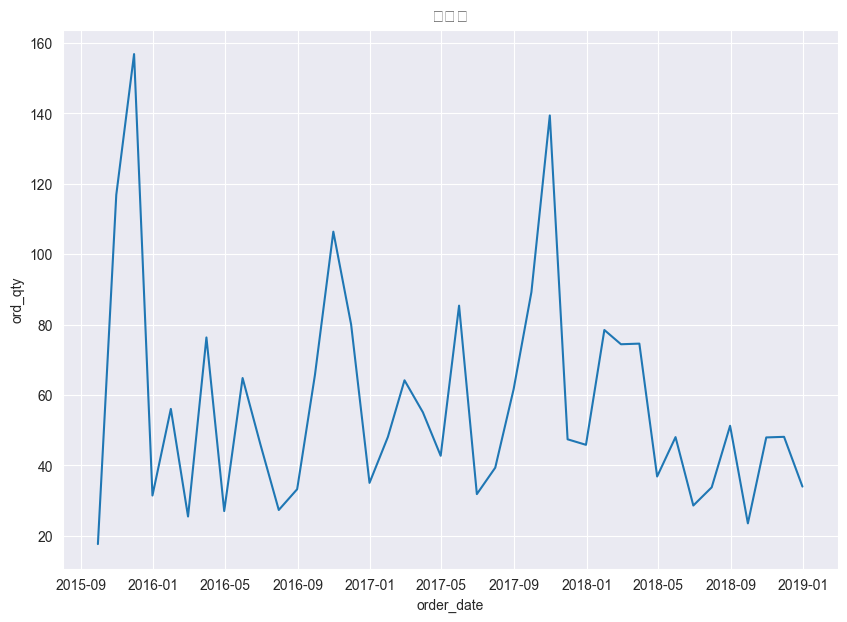

<AxesSubplot: title={'center': '月粒度'}, xlabel='order_date', ylabel='ord_qty'>

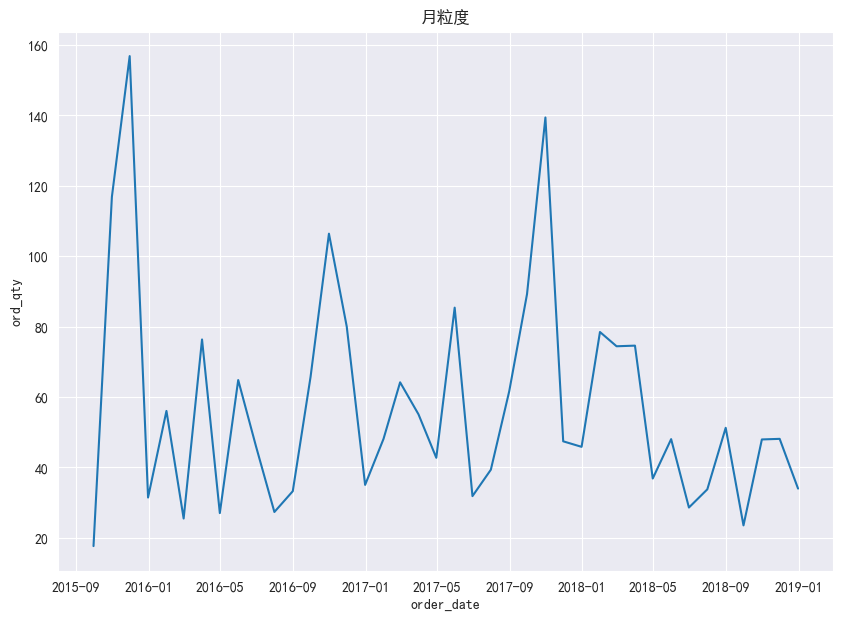

In [11]:
plt.figure(figsize=(10,7))
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体，如不使用中文字体会出现乱码
plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题
plt.title('月粒度')
sns.lineplot(x='order_date', y='ord_qty', data=df_train_20006_bymonth)

<AxesSubplot: title={'center': '周粒度'}, xlabel='order_date', ylabel='ord_qty'>

D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31890 (\N{CJK UNIFIED IDEOGRAPH-7C92}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31890 (\N{CJK UNIFIED IDEOGRAPH-

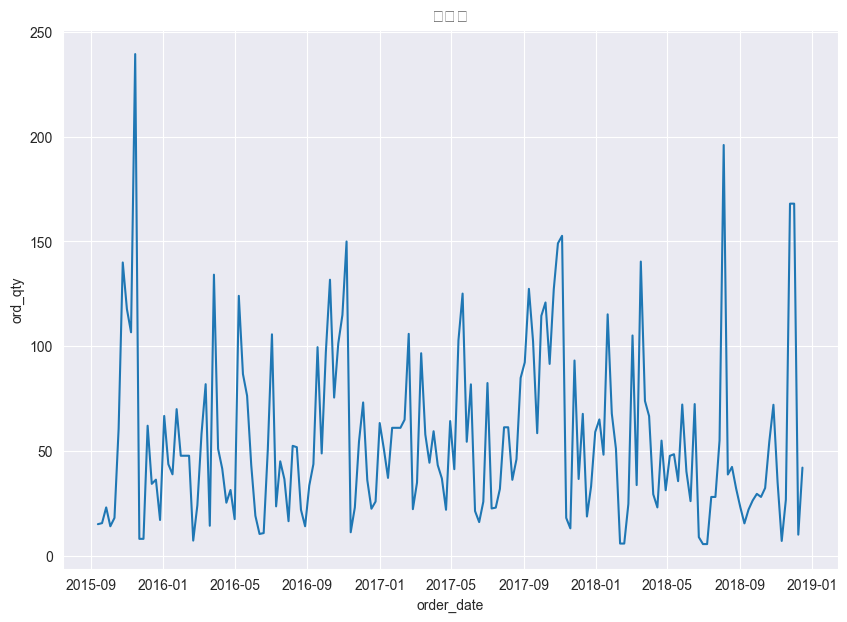

<AxesSubplot: title={'center': '周粒度'}, xlabel='order_date', ylabel='ord_qty'>

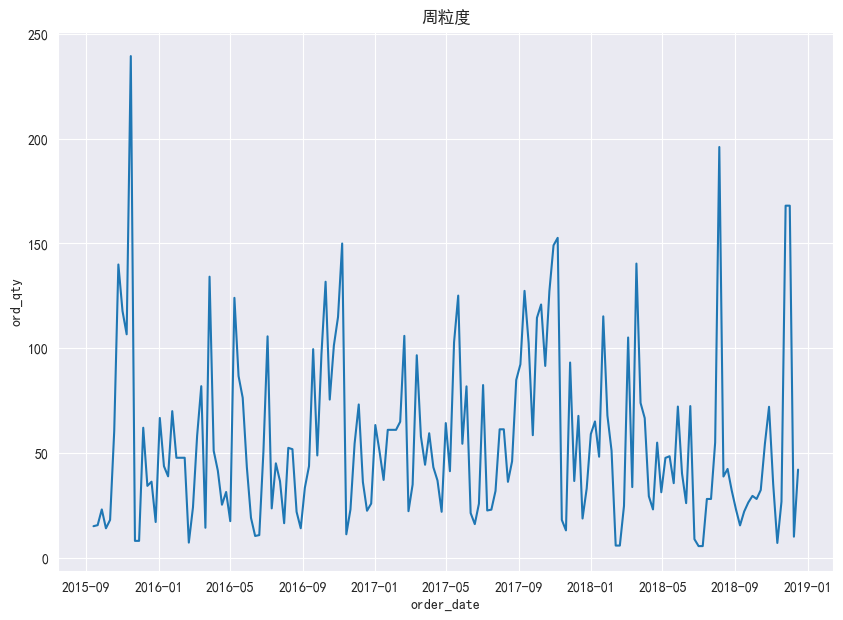

In [12]:
plt.figure(figsize=(10,7))
plt.title('周粒度')
sns.lineplot(x='order_date', y='ord_qty', data=df_train_20006_byweek)

<AxesSubplot: title={'center': '日粒度'}, xlabel='order_date', ylabel='ord_qty'>

D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31890 (\N{CJK UNIFIED IDEOGRAPH-7C92}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  func(*args, **kwargs)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31890 (\N{CJK UNIFIED IDEOGRAPH-

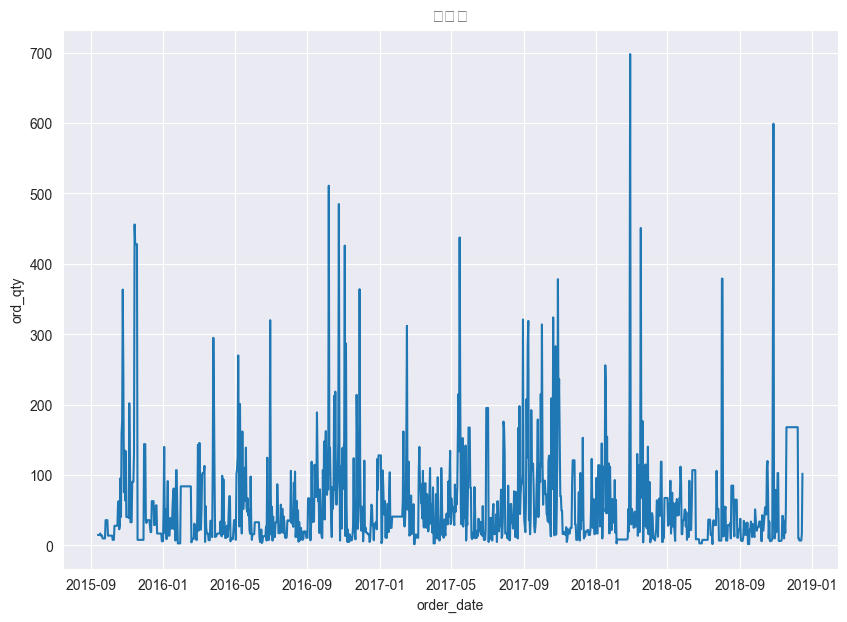

<AxesSubplot: title={'center': '日粒度'}, xlabel='order_date', ylabel='ord_qty'>

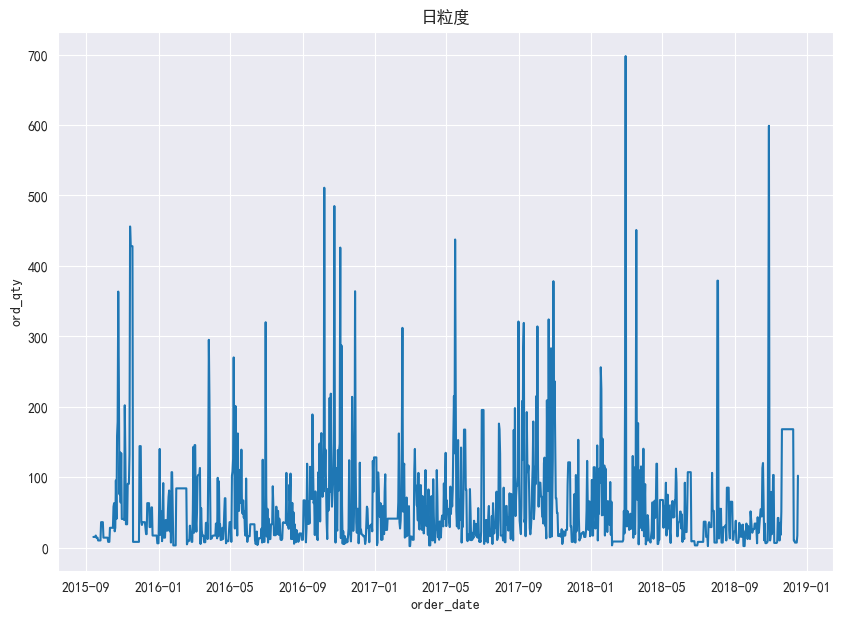

In [13]:
plt.figure(figsize=(10,7))
plt.title('日粒度')
sns.lineplot(x='order_date', y='ord_qty', data=df_train_20006_byday)

日粒度预测

In [19]:
from sklearn.preprocessing import MinMaxScaler
values = df_train_20006_byday['ord_qty'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

952 239


In [20]:
def create_dataset(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)


look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

942
229
(942, 10)
(229, 10)
(942,)
(229,)


Epoch 1/850
27/27 [==============================] - 45s 304ms/step - loss: 1.2910 - val_loss: 0.0244
Epoch 2/850
27/27 [==============================] - 1s 32ms/step - loss: 0.9133 - val_loss: 0.0196
Epoch 3/850
27/27 [==============================] - 2s 64ms/step - loss: 0.7330 - val_loss: 0.0186
Epoch 4/850
27/27 [==============================] - 2s 71ms/step - loss: 0.5851 - val_loss: 0.0177
Epoch 5/850
27/27 [==============================] - 3s 96ms/step - loss: 0.5262 - val_loss: 0.0180
Epoch 6/850
27/27 [==============================] - 2s 74ms/step - loss: 0.5147 - val_loss: 0.0177
Epoch 7/850
27/27 [==============================] - 2s 86ms/step - loss: 0.4275 - val_loss: 0.0179
Epoch 8/850
27/27 [==============================] - 2s 84ms/step - loss: 0.3854 - val_loss: 0.0175
Epoch 9/850
27/27 [==============================] - 2s 80ms/step - loss: 0.3119 - val_loss: 0.0174
Epoch 10/850
27/27 [==============================] - 2s 66ms/step - loss: 0.2981 - val_loss: 0.01

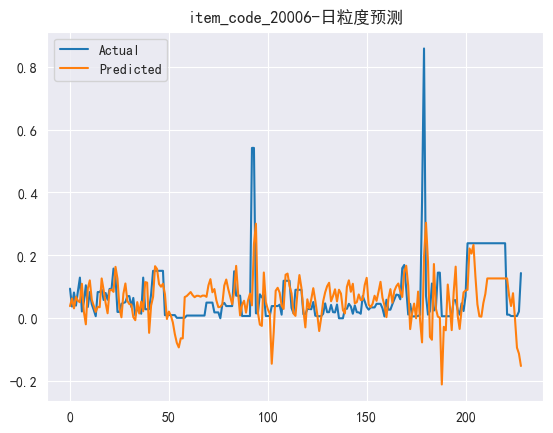

In [21]:
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# print(X_train.shape[0])
# print(X_train.shape[1])
# print(X_train.shape[2])

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# 指定 EarlyStopping 回调函数
early_stop = EarlyStopping(monitor='val_loss', patience=20)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
 # Compile the model
model.compile(optimizer=Adam(0.0009), loss='mse')
 # Train the model
history = model.fit(
    X_train, y_train,
    epochs=850,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stop]  # 添加 EarlyStopping 回调函数
)
y_pred = model.predict(X_test)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('item_code_20006-日粒度预测')
plt.legend()
plt.show()

周粒度预测

In [22]:
from sklearn.preprocessing import MinMaxScaler
values = df_train_20006_byweek['ord_qty'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

136 35


92
59
(92, 10)
(59, 10)
Epoch 1/850
3/3 [==============================] - 31s 3s/step - loss: 2.5629 - val_loss: 0.0244
Epoch 2/850
3/3 [==============================] - 0s 84ms/step - loss: 1.7835 - val_loss: 0.0206
Epoch 3/850
3/3 [==============================] - 0s 97ms/step - loss: 1.3340 - val_loss: 0.0176
Epoch 4/850
3/3 [==============================] - 0s 82ms/step - loss: 1.4825 - val_loss: 0.0141
Epoch 5/850
3/3 [==============================] - 0s 75ms/step - loss: 1.2678 - val_loss: 0.0116
Epoch 6/850
3/3 [==============================] - 0s 64ms/step - loss: 1.0365 - val_loss: 0.0094
Epoch 7/850
3/3 [==============================] - 0s 99ms/step - loss: 1.0543 - val_loss: 0.0079
Epoch 8/850
3/3 [==============================] - 0s 80ms/step - loss: 1.0849 - val_loss: 0.0078
Epoch 9/850
3/3 [==============================] - 0s 71ms/step - loss: 0.9260 - val_loss: 0.0089
Epoch 10/850
3/3 [==============================] - 0s 95ms/step - loss: 0.9478 - val_loss: 0.0

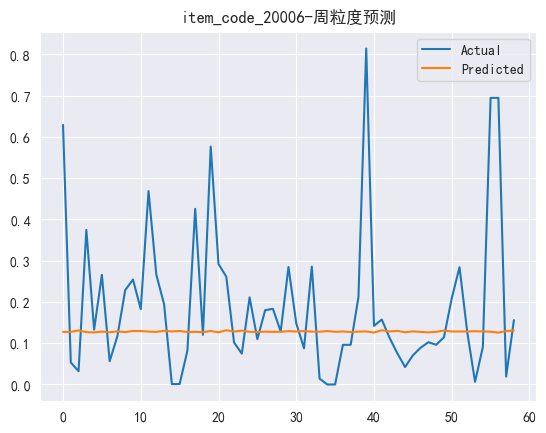

In [18]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)


look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(X_test.shape)

from keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# print(X_train.shape[0])
# print(X_train.shape[1])
# print(X_train.shape[2])

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


# 指定 EarlyStopping 回调函数
early_stop = EarlyStopping(monitor='val_loss', patience=20)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer=Adam(0.0009), loss='mse')
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=850,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stop]  # 添加 EarlyStopping 回调函数
)
y_pred = model.predict(X_test)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('item_code_20006-周粒度预测')
plt.legend()
plt.show()

In [23]:
train

array([[0.04061565],
       [0.04275331],
       [0.0748183 ],
       [0.03634031],
       [0.05344164],
       [0.23514321],
       [0.5747032 ],
       [0.47965926],
       [0.432236  ],
       [0.99999994],
       [0.01068833],
       [0.01068833],
       [0.2415562 ],
       [0.12291577],
       [0.13146645],
       [0.04916631],
       [0.26150775],
       [0.16304559],
       [0.14236853],
       [0.27540258],
       [0.18027648],
       [0.18027648],
       [0.18027648],
       [0.00712555],
       [0.07909363],
       [0.22478378],
       [0.3263503 ],
       [0.03740915],
       [0.5498076 ],
       [0.19452757],
       [0.15391192],
       [0.08443779],
       [0.11044606],
       [0.05087644],
       [0.5066267 ],
       [0.34701437],
       [0.30263236],
       [0.16117999],
       [0.05771697],
       [0.0206641 ],
       [0.02244549],
       [0.19310248],
       [0.42806754],
       [0.07695596],
       [0.16887558],
       [0.13253528],
       [0.04672326],
       [0.200

In [24]:
scaled

array([[0.04061565],
       [0.04275331],
       [0.0748183 ],
       [0.03634031],
       [0.05344164],
       [0.23514321],
       [0.5747032 ],
       [0.47965926],
       [0.432236  ],
       [0.99999994],
       [0.01068833],
       [0.01068833],
       [0.2415562 ],
       [0.12291577],
       [0.13146645],
       [0.04916631],
       [0.26150775],
       [0.16304559],
       [0.14236853],
       [0.27540258],
       [0.18027648],
       [0.18027648],
       [0.18027648],
       [0.00712555],
       [0.07909363],
       [0.22478378],
       [0.3263503 ],
       [0.03740915],
       [0.5498076 ],
       [0.19452757],
       [0.15391192],
       [0.08443779],
       [0.11044606],
       [0.05087644],
       [0.5066267 ],
       [0.34701437],
       [0.30263236],
       [0.16117999],
       [0.05771697],
       [0.0206641 ],
       [0.02244549],
       [0.19310248],
       [0.42806754],
       [0.07695596],
       [0.16887558],
       [0.13253528],
       [0.04672326],
       [0.200

In [29]:
from sklearn.preprocessing import MinMaxScaler
values = df_train_20006_bymonth['ord_qty'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

28 12


In [30]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)


look_back = 5
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(X_test.shape)

23
7
(23, 5)
(7, 5)


In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(23, 1, 5)
(7, 1, 5)


23
1
Epoch 1/850
1/1 [==============================] - 15s 15s/step - loss: 2.2320 - val_loss: 0.2782
Epoch 2/850
1/1 [==============================] - 0s 52ms/step - loss: 2.5831 - val_loss: 0.2724
Epoch 3/850
1/1 [==============================] - 0s 54ms/step - loss: 3.0273 - val_loss: 0.2696
Epoch 4/850
1/1 [==============================] - 0s 59ms/step - loss: 2.0611 - val_loss: 0.2650
Epoch 5/850
1/1 [==============================] - 0s 55ms/step - loss: 1.3079 - val_loss: 0.2587
Epoch 6/850
1/1 [==============================] - 0s 58ms/step - loss: 1.2479 - val_loss: 0.2529
Epoch 7/850
1/1 [==============================] - 0s 65ms/step - loss: 1.8373 - val_loss: 0.2477
Epoch 8/850
1/1 [==============================] - 0s 56ms/step - loss: 1.7225 - val_loss: 0.2422
Epoch 9/850
1/1 [==============================] - 0s 54ms/step - loss: 1.0343 - val_loss: 0.2369
Epoch 10/850
1/1 [==============================] - 0s 52ms/step - loss: 1.0162 - val_loss: 0.2315
Epoch 11/850
1

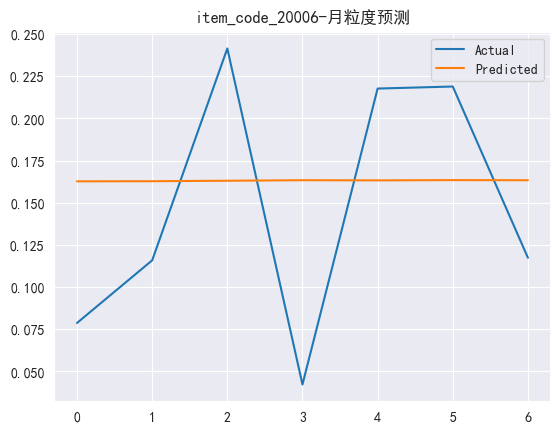

In [33]:
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

print(X_train.shape[0])
print(X_train.shape[1])
# print(X_train.shape[2])
# 指定 EarlyStopping 回调函数
early_stop = EarlyStopping(monitor='val_loss', patience=20)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
 # Compile the model
model.compile(optimizer=Adam(0.001), loss='mse')
 # Train the model
history = model.fit(
    X_train, y_train,
    epochs=850,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stop]  # 添加 EarlyStopping 回调函数
)
y_pred = model.predict(X_test)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('item_code_20006-月粒度预测')
plt.legend()
plt.show()

In [28]:
print(y_pred.shape)
print(y_test.shape)

(59, 1)
(59,)


In [29]:
y_pred = np.squeeze(y_pred)
y_pred.shape

(59,)

In [30]:
from keras.losses import mean_squared_error

# 将 y_pred 和 y_test 逆归一化
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 计算 MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
# print("MSE: ", mse)
tot_mse = tf.reduce_sum(mse)
avg_mse = tot_mse / mse.shape[0]
print('Test MSE: %.3f' % avg_mse)
# print(mse.shape[0])

Test MSE: 3058.072


In [31]:
df_30_days_past=df_train_20006_byday.iloc[-100:-90,:]
df_30_days_past

,ord_qty
order_date,
2018-09-08,35.0
2018-09-09,15.5
2018-09-10,15.5
2018-09-11,31.5
2018-09-12,15.5
2018-09-13,15.0
2018-09-14,32.5
2018-09-15,2.0
2018-09-16,2.0


In [32]:
## 首先计算一个样本item_code = 20011 这个商品未来三个月的销量预测

## 先构造预测数据集

data_pre_exm = data_pre.loc[data_pre['item_code'] == 20006][0:1]
data_pre_new = pd.DataFrame(np.repeat(data_pre_exm.values,101,axis=0))
data_pre_new.columns = data_pre_exm.columns
# data_pre_new = data_pre_new[['']]
data_pre_new["ord_qty"]=0
df_90_days_future=data_pre_new[["ord_qty"]]
df_90_days_future

,ord_qty
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [33]:
old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_90_days_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)
full_df

D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


,0
0,0.126122
1,0.042753
2,0.042753
3,0.111159
4,0.042753
...,...
106,NaN
107,NaN
108,NaN
109,NaN


In [34]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=10
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
    full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]].reshape(1,10))
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

full_df

1/1 [==============================] - 0s 24ms/step


,0
0,0.126122
1,0.042753
2,0.042753
3,0.111159
4,0.042753
...,...
106,0.343755
107,0.343755
108,0.343755
109,0.343755


In [35]:
date = pd.date_range('2018-12-21', '2019-03-31',freq='D')
print(date)

DatetimeIndex(['2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30',
               ...
               '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25',
               '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
               '2019-03-30', '2019-03-31'],
              dtype='datetime64[ns]', length=101, freq='D')


In [36]:
# 添加未来要预测的3个月
future = pd.DataFrame(index=date, columns= df_train_20006_byday.columns)
future['ord_qty'] = np.rint(scaler.inverse_transform(full_df.values)[10::])
df_alldata = pd.concat([df_train_20006_byday, future])
df_alldata

,ord_qty
2015-09-13,15.0
2015-09-14,15.0
2015-09-15,15.0
2015-09-16,15.0
2015-09-17,17.0
...,...
2019-03-27,86.0
2019-03-28,86.0
2019-03-29,86.0
2019-03-30,86.0


In [37]:
# 添加未来要预测的3个月
future = pd.DataFrame(index=date, columns= df_train_20006_byday.columns)
future['ord_qty'] = np.rint(scaler.inverse_transform(full_df.values)[10::])
df_alldata = pd.concat([df_train_20006_byday, future])
df_alldata

,ord_qty
2015-09-13,15.0
2015-09-14,15.0
2015-09-15,15.0
2015-09-16,15.0
2015-09-17,17.0
...,...
2019-03-27,86.0
2019-03-28,86.0
2019-03-29,86.0
2019-03-30,86.0


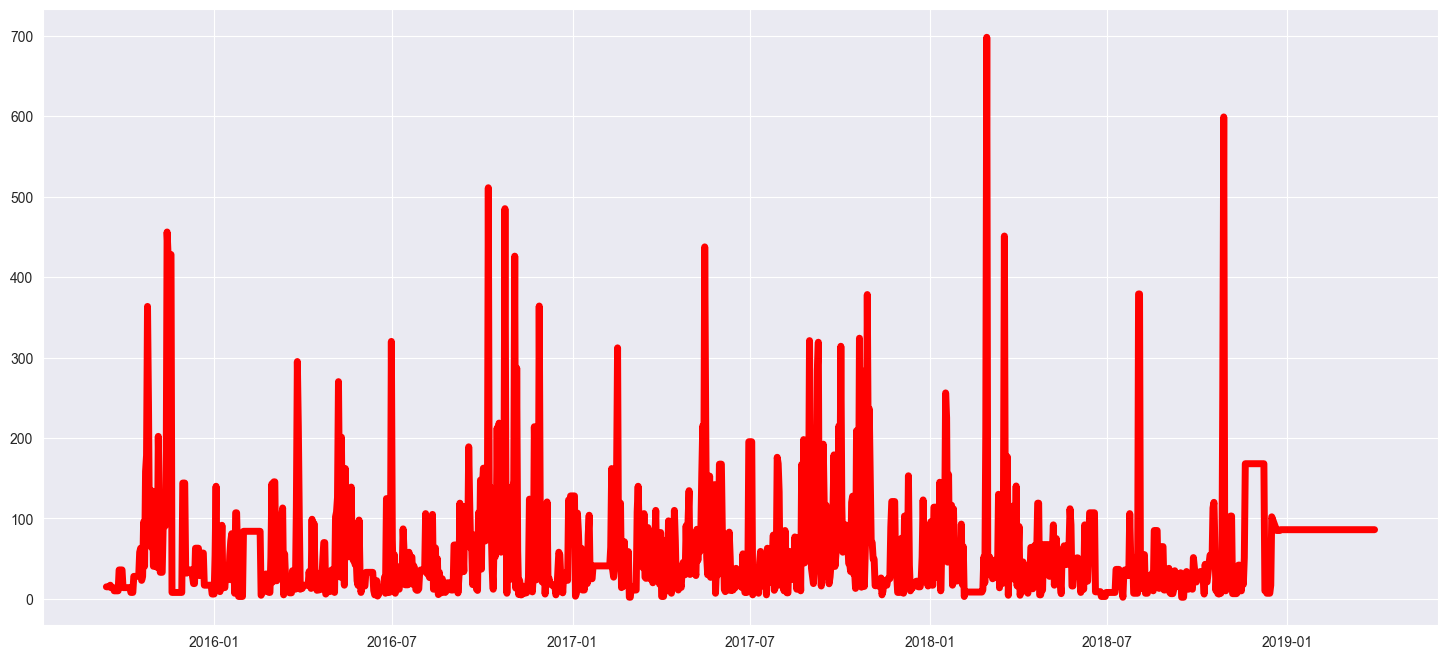

In [38]:
plt.figure(figsize=(18, 8))
plt.plot(df_alldata['ord_qty'], label='商品code：20006按天的订单需求', color='red', linestyle='-',linewidth = '5')

D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\IPython\core\pylabtools.p

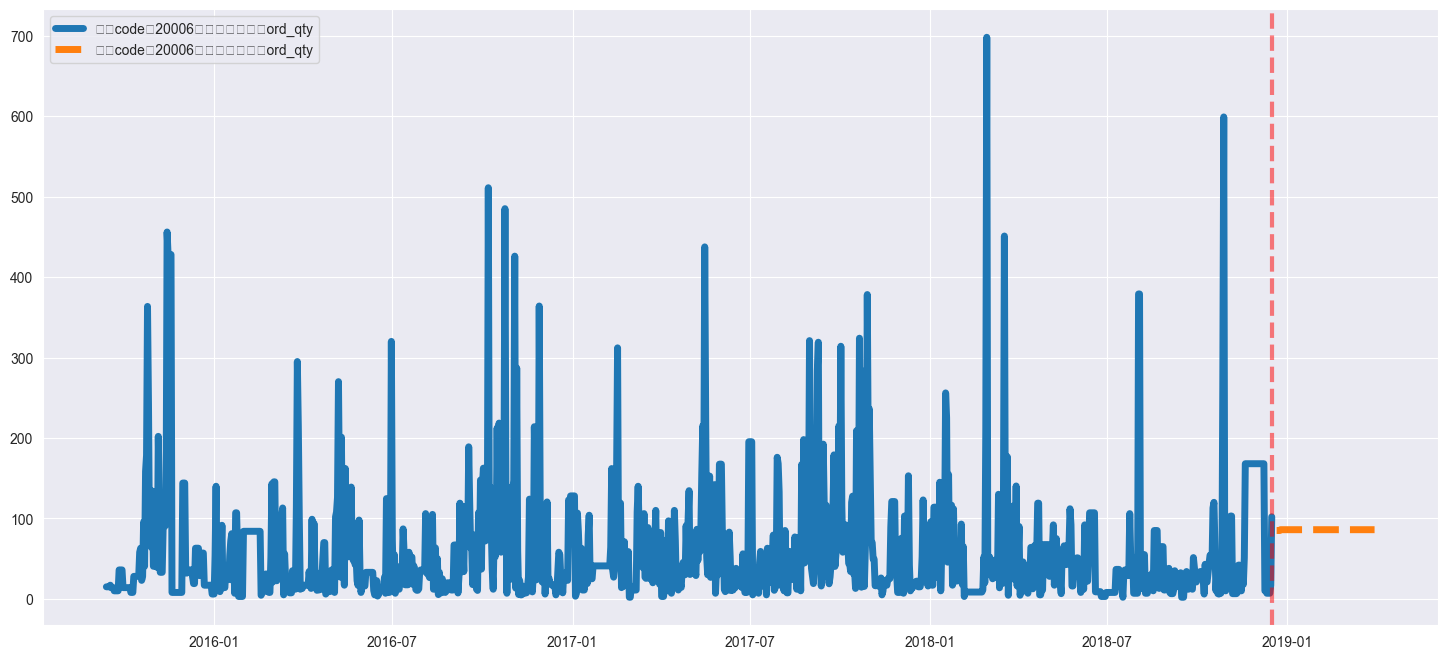

In [39]:
def predict_plot(df,data,label):
    plt.figure(figsize=(18, 8))
    plt.plot(df.loc[:,label], label='商品code：20006按天的订单'+'实际'+label,linestyle='-',linewidth = '5')
    plt.axvline(x=df.index[-1], alpha=0.5, c="r", ls="--", lw=3)
    # plt.plot(test['count'], label='Test')
    plt.plot(data[label], label='商品code：20006按天的订单'+'预测'+label,linestyle='--',linewidth = '5')
    plt.legend(loc='best')
    plt.show()

predict_plot(df_train_20006_byday,future,'ord_qty')